In [1]:
import random
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams
from sklearn.metrics import roc_curve ,auc,recall_score,precision_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold, GridSearchCV
from numpy import sqrt ,argmax
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
rcParams['figure.figsize']= [10,10]
os.chdir("D:\Anamika\F\Downloads" )

In [2]:
df = pd.read_csv(r"D:\Anamika\F\Semester 7\MDD\parkinsons.csv")
print(df)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5    phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6    phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7    phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8    phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9    phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10   phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11   phon_R01_S02_6       91.904       1

In [3]:
df_1 =df[['MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(%)','NHR','DFA','spread1','spread2','D2','PPE','status']]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
MDVP:Fhi(Hz)      195 non-null float64
MDVP:Flo(Hz)      195 non-null float64
MDVP:Jitter(%)    195 non-null float64
NHR               195 non-null float64
DFA               195 non-null float64
spread1           195 non-null float64
spread2           195 non-null float64
D2                195 non-null float64
PPE               195 non-null float64
status            195 non-null int64
dtypes: float64(9), int64(1)
memory usage: 15.3 KB


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(df_1)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.31267031e+02  1.52955688e+02  5.81109375e-03  2.44789063e-02
   6.97466313e-01 -6.10380041e+00  2.14617922e-01  2.48445106e+00
   1.79021156e-01  5.31250000e-01]
 [ 1.50125392e+02  9.91495250e+01  6.20866667e-03  2.26248333e-02
   7.32311958e-01 -5.48588951e+00  2.29475675e-01  2.31372242e+00
   2.19711133e-01  8.75000000e-01]
 [ 5.10847455e+02  9.05632727e+01  8.73090909e-03  5.12318182e-02
   6.83094091e-01 -5.40976345e+00  2.63353636e-01  2.52768436e+00
   2.23170909e-01  7.27272727e-01]]


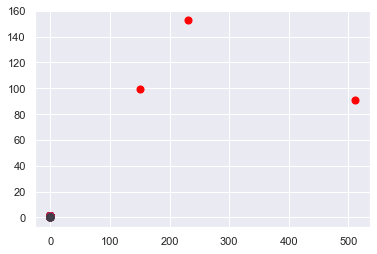

In [5]:
plt.scatter(df_1['NHR'], df_1['status'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [6]:
predict =kmeans.labels_

In [7]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_1, kmeans.labels_))

0.5019489947602077


In [8]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_1)
    kmeanModel.fit(df_1)
 
    distortions.append(sum(np.min(cdist(df_1, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_1.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df_1, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_1.shape[0]
    mapping2[k] = kmeanModel.inertia_

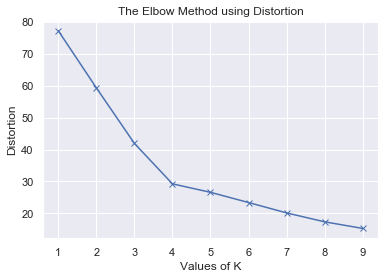

In [9]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [10]:
df_1['NEW_COLUMN'] = pd.Series(predict, index=df_1.index)

C:\Users\vatsa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_1

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),NHR,DFA,spread1,spread2,D2,PPE,status,NEW_COLUMN
0,157.302,74.997,0.00784,0.02211,0.815285,-4.813031,0.266482,2.301442,0.284654,1,1
1,148.650,113.819,0.00968,0.01929,0.819521,-4.075192,0.335590,2.486855,0.368674,1,1
2,131.111,111.555,0.01050,0.01309,0.825288,-4.443179,0.311173,2.342259,0.332634,1,1
3,137.871,111.366,0.00997,0.01353,0.819235,-4.117501,0.334147,2.405554,0.368975,1,1
4,141.781,110.655,0.01284,0.01767,0.823484,-3.747787,0.234513,2.332180,0.410335,1,1
5,131.162,113.787,0.00968,0.01222,0.825069,-4.242867,0.299111,2.187560,0.357775,1,1
6,137.244,114.820,0.00333,0.00607,0.764112,-5.634322,0.257682,1.854785,0.211756,1,1
7,113.840,104.315,0.00290,0.00344,0.763262,-6.167603,0.183721,2.064693,0.163755,1,1
8,132.068,91.754,0.00551,0.01070,0.773587,-5.498678,0.327769,2.322511,0.231571,1,1
9,120.103,91.226,0.00532,0.01022,0.798463,-5.011879,0.325996,2.432792,0.271362,1,1


In [12]:
cluster_1=df_1[df_1.NEW_COLUMN==0]
cluster_2 =df_1[df_1.NEW_COLUMN==1]
cluster_3 =df_1[df_1.NEW_COLUMN==2]


In [13]:
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)

(64, 11)
(120, 11)
(11, 11)


In [14]:
c1_y= cluster_3.status
c1_x=cluster_3.drop(['status'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(c1_x,c1_y,test_size =0.3,stratify=c1_y)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7, 10)
(7,)
(4, 10)
(4,)


In [15]:
from xgboost import XGBClassifier
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(x_train, y_train)
preds =model.predict (x_test)

[14:17:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\vatsa\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best threshold=1.713456 ,G-Mean =0.000


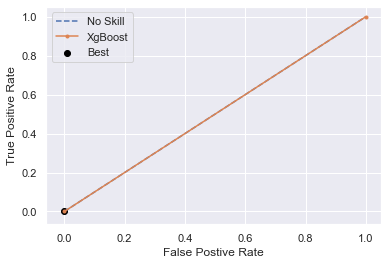

In [16]:
# Plotting the Auc curve and best threshold
yhat = model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds =roc_curve(y_test,yhat)
gmeans =sqrt(tpr* (1-fpr))
ix=argmax(gmeans)
print('Best threshold=%f ,G-Mean =%.3f' % (thresholds[ix],gmeans[ix]))
pyplot.plot([0,1],[0,1],linestyle ='--',label ='No Skill')
pyplot.plot(fpr,tpr,marker='.',label='XgBoost')
pyplot.scatter(fpr[ix],tpr[ix],marker='o',color='black',label='Best')
pyplot.xlabel('False Postive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [17]:
from sklearn.metrics import confusion_matrix
cm1 =confusion_matrix(y_test,preds)
total =sum(sum(cm1))

accuracy = (cm1[0,0]+cm1[1,1])/total
print('Accuracy :',accuracy)

specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('specificity :',specificity)

sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('sensitivity :',sensitivity)

Accuracy : 0.75
specificity : 0.0
sensitivity : 1.0


In [18]:
print(confusion_matrix(y_test,preds))

[[0 1]
 [0 3]]
